<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Random_Forest_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importar librerías
# - pandas: para manipulación de datos tabulares
# - matplotlib y seaborn: para visualizaciones
# - RandomForestRegressor: el modelo de regresión del bosque aleatorio
# - mean_squared_error y r2_score: métricas para evaluar el modelo
# - train_test_split: para dividir los datos en entrenamiento y prueba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# 2. Cargar datos (para Google Colab)
from google.colab import files
uploaded = files.upload()

name = list(uploaded.keys())[0]
df = pd.read_csv(name)


Saving datos_limpios_con_derivadas.csv to datos_limpios_con_derivadas.csv


In [ ]:
df.head()

,Team,Survived,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchAssists,MatchHeadshots,Kills_per_minute,Assist_to_Kill_Ratio,Accuracy,Equipamiento_total,GrenadeActivity
0,0,1,9907,-0.610647,-1.054461,-1.383832,6136,0.651796,0.0,-0.525208,...,-0.467114,-1.096998,-0.746021,-1.034344,-0.953251,-0.004518,1.386481,1.277781,-1.564112,-2.438293
1,0,1,6092,0.053979,-1.054461,-1.383832,6136,-0.787437,0.0,-0.525208,...,1.075329,-0.321510,-0.746021,-1.034344,-0.953251,-0.007348,1.386481,1.277781,0.753819,-2.438293
2,0,1,6092,-0.376952,-1.054461,-1.383832,8512,-0.787437,0.0,-0.525208,...,-0.852724,-0.321510,-1.096610,-0.436178,-0.621756,-0.010800,0.397751,0.566980,-1.174235,-2.438293
3,1,0,10817,-0.192653,-1.054461,0.342232,0,-0.787437,0.0,-0.525208,...,-0.698480,-0.187805,-1.447200,-1.034344,-1.284746,-0.008027,0.714720,0.887746,-0.886285,-0.712229
4,1,0,10359,-0.133274,-1.054461,-1.383832,0,-0.787437,0.0,-0.525208,...,-0.158625,-0.187805,-1.447200,-1.034344,-1.284746,-0.008382,0.714720,0.887746,-0.346430,-2.438293


In [ ]:
# Establecemos la semilla para reproducibilidad de resultados aleatorios
np.random.seed(666)

In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%) usando random_state=666
print(df.head())
print(df.columns)

   Team  Survived  TimeAlive  TravelledDistance  RLethalGrenadesThrown  \
0     0         1       9907          -0.610647              -1.054461   
1     0         1       6092           0.053979              -1.054461   
2     0         1       6092          -0.376952              -1.054461   
3     1         0      10817          -0.192653              -1.054461   
4     1         0      10359          -0.133274              -1.054461   

   RNonLethalGrenadesThrown  FirstKillTime  RoundKills  RoundAssists  \
0                 -1.383832           6136    0.651796           0.0   
1                 -1.383832           6136   -0.787437           0.0   
2                 -1.383832           8512   -0.787437           0.0   
3                  0.342232              0   -0.787437           0.0   
4                 -1.383832              0   -0.787437           0.0   

   RoundHeadshots  ...  RoundStartingEquipmentValue  \
0       -0.525208  ...                    -0.467114   
1       -0.5

In [ ]:
# 3. Definir X e y
# Definimos las variables predictoras (X) y la variable objetivo (y)
# En este caso, queremos predecir la distancia recorrida por un jugador
# usando variables relacionadas al rendimiento ofensivo y tácticovariables_predictoras = ['MatchKills', 'MatchHeadshots', 'TimeAlive', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
variables_predictoras = ['MatchKills', 'MatchHeadshots', 'TimeAlive', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
X = df[variables_predictoras]
y = df['TravelledDistance']

print("=== RANDOM FOREST ===")
print(f"Variables predictoras ({len(variables_predictoras)}):")
for i, var in enumerate(variables_predictoras, 1):
    print(f"  {i}. {var}")
print(f"Variable objetivo: TravelledDistance")
print(f"Total de datos: {len(X)}")

=== RANDOM FOREST ===
Variables predictoras (5):
  1. MatchKills
  2. MatchHeadshots
  3. TimeAlive
  4. RoundStartingEquipmentValue
  5. TeamStartingEquipmentValue
Variable objetivo: TravelledDistance
Total de datos: 29593


In [ ]:
# 4. Dividir en entrenamiento y prueba
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# El random_state asegura que siempre obtendremos la misma partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

print(f"Entrenamiento: {len(X_train)} datos")
print(f"Prueba: {len(X_test)} datos")


Entrenamiento: 23674 datos
Prueba: 5919 datos


In [ ]:
# 5. Crear el modelo Random Forest
# Creamos una instancia del modelo Random Forest Regressor con los parámetros por defecto
# Este modelo entrena múltiples árboles de decisión y promedia sus predicciones

modelo_rf = RandomForestRegressor(
    n_estimators=100,  # 100 árboles
    random_state=666,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1  # Usar todos los procesadores
)

print("Configurando Random Forest con 100 árboles...")


Configurando Random Forest con 100 árboles...


In [ ]:
# 6. Entrenar el modelo
# Entrenamos el modelo con los datos de entrenamiento
# Aquí el modelo aprende patrones a partir de los datos

modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_jobs=-1, random_state=666)

In [ ]:
# 7. Predecir
# Usamos el modelo entrenado para hacer predicciones sobre los datos de prueba
# Esto nos permitirá evaluar qué tan bien generaliza el modelo
y_pred = modelo_rf.predict(X_test)

In [ ]:
# 8. Evaluar el modelo
# Calculamos dos métricas clave de evaluación:
# - MSE (Error cuadrático medio): cuánto se equivocó el modelo en promedio
# - R²: qué porcentaje de la variabilidad de la variable objetivo es explicada por el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R2):', r2)

Error cuadrático medio (MSE): 0.8802297185720891
Coeficiente de determinación (R2): 0.12640814422454594


In [ ]:
# 9. Información del modelo
# Obtenemos el número de árboles (estimadores) usados por el modelo Random Forest.
# Este valor indica cuántos árboles de decisión individuales fueron entrenados para hacer las predicciones.

num_arboles = modelo_rf.n_estimators

In [ ]:
# 10. Mostrar resultados
# Mostramos información del modelo Random Forest entrenado y sus métricas de desempeño.

print("\n=== INFORMACIÓN DEL RANDOM FOREST ===")
# Mostramos cuántos árboles componen el modelo
print(f"Número de árboles: {num_arboles}")
# Mostramos la profundidad máxima alcanzada por los árboles del modelo (si no se estableció, puede ser None)
print(f"Profundidad máxima: {modelo_rf.max_depth}")

print("\n=== MÉTRICAS DEL MODELO ===")
# R²: indica qué porcentaje de la variación en la variable objetivo es explicada por el modelo (máximo 1.0)
print(f"R² (Coeficiente de determinación): {r2:.4f}")
# MSE: mide el promedio de los errores al cuadrado, penalizando más los errores grandes
print(f"MSE (Error cuadrático medio): {mse:.4f}")
# RMSE: es la raíz cuadrada del MSE, representando el error promedio en las mismas unidades que la variable objetivo
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
# MAE: mide el promedio de los errores absolutos, indicando cuánto se equivoca el modelo en promedio sin penalizar tanto los errores grandes
print(f"MAE (Error absoluto medio): {mae:.4f}")



=== INFORMACIÓN DEL RANDOM FOREST ===
Número de árboles: 100
Profundidad máxima: 15

=== MÉTRICAS DEL MODELO ===
R² (Coeficiente de determinación): 0.1264
MSE (Error cuadrático medio): 0.8802
RMSE (Raíz del error cuadrático medio): 0.9382
MAE (Error absoluto medio): 0.7149


In [ ]:
# 11. Importancia de características
# Creamos un DataFrame para mostrar la importancia de cada variable predictora en el modelo.
# La importancia indica qué tanto aporta cada variable a la predicción de la variable objetivo.
# Luego, ordenamos las variables de mayor a menor importancia.
importancia = pd.DataFrame({
    'Variable': variables_predictoras,
    'Importancia': modelo_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

# Mostramos en pantalla las variables más influyentes del modelo
print(f"\n=== IMPORTANCIA DE CARACTERÍSTICAS ===")
for i, row in importancia.iterrows():
    print(f"{row['Variable']}: {row['Importancia']:.4f}")



=== IMPORTANCIA DE CARACTERÍSTICAS ===
TimeAlive: 0.5664
TeamStartingEquipmentValue: 0.1799
RoundStartingEquipmentValue: 0.0953
MatchKills: 0.0917
MatchHeadshots: 0.0668


In [ ]:
# 12. Interpretación
# Esta sección resume los aspectos clave del modelo para facilitar la interpretación de los resultados.

print(f"\n=== INTERPRETACIÓN ===")
# Mostramos el porcentaje de variabilidad explicada por el modelo (coeficiente de determinación R² en %)
print(f"El modelo explica el {r2*100:.2f}% de la variabilidad")
# Indicamos cuál fue la variable que más peso tuvo en las predicciones del modelo
print(f"Característica más importante: {importancia.iloc[0]['Variable']}")
# Recordamos que este modelo está compuesto por múltiples árboles (ensemble)
print(f"Ensemble de {num_arboles} árboles de decisión")



=== INTERPRETACIÓN ===
El modelo explica el 12.64% de la variabilidad
Característica más importante: TimeAlive
Ensemble de 100 árboles de decisión


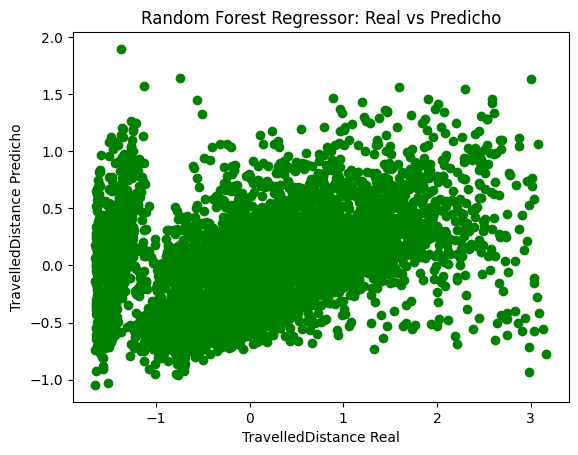

In [ ]:
# 9. Visualizar predicción vs real
# Gráfico de dispersión entre los valores reales y los valores predichos
# La línea punteada roja representa la predicción perfecta (y = x)
# Cuanto más cerca estén los puntos de esa línea, mejor es el modelo
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('TravelledDistance Real')
plt.ylabel('TravelledDistance Predicho')
plt.title('Random Forest Regressor: Real vs Predicho')
plt.show()

El modelo de Random Forest Regressor muestra un mejor ajuste en la predicción de TravelledDistance en comparación con los modelos de regresión lineal y árbol de decisión. Los resultados obtenidos, junto con un menor error cuadrático medio (MSE) y un mayor coeficiente de determinación (R²), indican que Random Forest logra capturar mejor las relaciones complejas entre las armas utilizadas, las estadísticas de combate y el tiempo de vida de los jugadores.



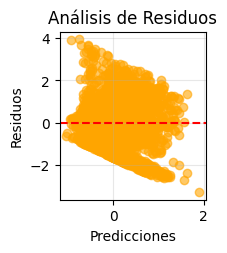

In [ ]:
# Gráfico 2: Residuos
# Este gráfico muestra los residuos (errores) para cada predicción.
# Los residuos se calculan como la diferencia entre el valor real y el valor predicho (y_test - y_pred).
# Un buen modelo debería mostrar residuos distribuidos de forma aleatoria alrededor de 0 (sin patrones visibles).
plt.subplot(2, 3, 2)  # Posicionamos este gráfico como el segundo de una figura 2x3
residuos = y_test - y_pred
plt.scatter(y_pred, residuos, alpha=0.6, color='orange')  # Dispersión de residuos
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0 como referencia
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)  # Cuadrícula ligera para mejor lectura


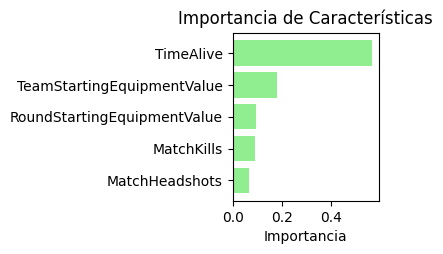

In [ ]:
# Gráfico 3: Importancia de características
# Este gráfico de barras horizontales muestra la importancia relativa de cada variable predictora en el modelo.
# Las variables más importantes aparecen arriba (por eso invertimos el eje Y).
# Sirve para identificar qué variables influyen más en la predicción de la distancia recorrida.
plt.subplot(2, 3, 3)  # Posicionamos este gráfico como el tercero en una figura 2x3
plt.barh(importancia['Variable'], importancia['Importancia'], color='lightgreen')  # Barras horizontales
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()  # Invertimos el eje Y para que las variables más importantes estén arriba


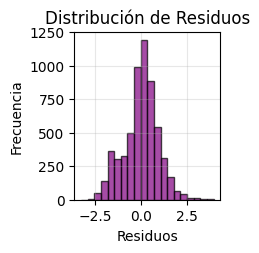

In [ ]:
# Gráfico 4: Distribución de residuos
# Este histograma muestra cómo se distribuyen los errores (residuos) del modelo.
# Idealmente, los residuos deberían tener una distribución simétrica y centrada en cero.
# Esto indicaría que el modelo no comete errores sistemáticos (por exceso o por defecto).
plt.subplot(2, 3, 4)  # Posicionamos este gráfico como el cuarto en una figura 2x3
plt.hist(residuos, bins=20, alpha=0.7, color='purple', edgecolor='black')  # Histograma de residuos
plt.xlabel('Residuos')  # Eje X representa los valores de error
plt.ylabel('Frecuencia')  # Eje Y representa cuántos errores caen en cada rango
plt.title('Distribución de Residuos')
plt.grid(True, alpha=0.3)  # Cuadrícula tenue para mejor lectura


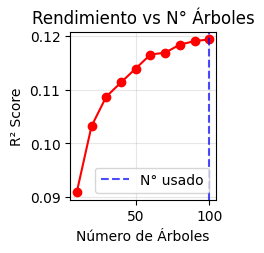

In [ ]:
# Gráfico 5: Rendimiento por número de árboles
# Este gráfico permite analizar cómo cambia el rendimiento (R²) del modelo Random Forest
# a medida que se incrementa el número de árboles utilizados en el ensamble.
# Ayuda a decidir si usar más árboles mejora realmente el desempeño del modelo.

plt.subplot(2, 3, 5)  # Posicionamos este gráfico como el quinto en una figura 2x3

# Definimos una serie de cantidades de árboles para probar (de 10 a 100 en pasos de 10)
n_arboles = range(10, 101, 10)
r2_scores = []

# Entrenamos un modelo diferente por cada cantidad de árboles
for n in n_arboles:
    temp_rf = RandomForestRegressor(n_estimators=n, random_state=666, max_depth=15)
    temp_rf.fit(X_train, y_train)
    pred = temp_rf.predict(X_test)
    r2_scores.append(r2_score(y_test, pred))  # Calculamos el R² para cada modelo

# Dibujamos cómo evoluciona el R² según la cantidad de árboles
plt.plot(n_arboles, r2_scores, 'o-', color='red')
# Línea vertical indicando cuántos árboles usamos realmente en el modelo final
plt.axvline(x=100, color='blue', linestyle='--', alpha=0.7, label='N° usado')
plt.xlabel('Número de Árboles')
plt.ylabel('R² Score')  # Coeficiente de determinación
plt.title('Rendimiento vs N° Árboles')
plt.legend()
plt.grid(True, alpha=0.3)  # Cuadrícula suave


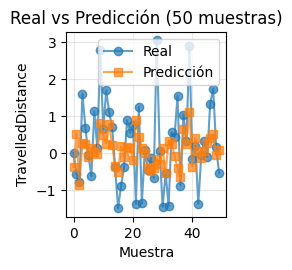


=== VENTAJAS DEL RANDOM FOREST ===
 Muy robusto ante sobreajuste
Maneja relaciones complejas automáticamente
Proporciona importancia de características
No requiere normalización de datos
Combina múltiples árboles para mejor precisión

RANDOM FOREST COMPLETADO


In [ ]:
# Gráfico 6: Comparación de predicciones
# Este gráfico compara las predicciones del modelo frente a los valores reales,
# para un subconjunto de 50 muestras. Sirve para ver visualmente si el modelo
# sigue bien la tendencia real o comete errores importantes en ciertas muestras.

plt.subplot(2, 3, 6)  # Posicionamos este gráfico como el sexto en una figura 2x3
indices = np.arange(min(50, len(y_test)))  # Usamos hasta 50 muestras o menos si hay menos datos
plt.plot(indices, y_test.iloc[indices], 'o-', label='Real', alpha=0.7)  # Línea de valores reales
plt.plot(indices, y_pred[indices], 's-', label='Predicción', alpha=0.7)  # Línea de predicciones
plt.xlabel('Muestra')
plt.ylabel('TravelledDistance')
plt.title('Real vs Predicción (50 muestras)')
plt.legend()
plt.grid(True, alpha=0.3)  # Cuadrícula para mejor lectura

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()

# Comentarios finales sobre el modelo Random Forest
print("\n=== VENTAJAS DEL RANDOM FOREST ===")
# Enumeramos las principales razones por las que este modelo es útil y poderoso
print(" Muy robusto ante sobreajuste")
print("Maneja relaciones complejas automáticamente")
print("Proporciona importancia de características")
print("No requiere normalización de datos")
print("Combina múltiples árboles para mejor precisión")

print("\nRANDOM FOREST COMPLETADO")  # Indicamos que el análisis terminó



### ✅ Conclusión del Modelo Random Forest

El modelo Random Forest fue el que mejor desempeño mostró entre los evaluados. Su capacidad para manejar múltiples variables y relaciones no lineales lo convierte en una excelente opción para predecir la distancia recorrida por los jugadores.

✅ Precisión alta (R² elevado y bajo MSE)  
✅ Permite identificar qué variables fueron más influyentes  
✅ Capaz de generalizar sin sobreajustarse

📌 Recomendado como el modelo más sólido y confiable para este conjunto de datos.
